<a href="https://colab.research.google.com/github/zee-1/COVID-Data-Analysis/blob/main/COVID_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing dataset
vaccination_dataframe = pd.read_csv('vaccination-data.csv')
vaccination_metadata_dataframe = pd.read_csv('vaccination-metadata.csv')

covid_data = pd.read_csv('WHO-COVID-19-global-data.csv',on_bad_lines='skip')

In [ ]:
vaccination_dataframe.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Afghanistan,AFG,EMRO,REPORTING,2023-01-06,12526397.0,11533150,32.178,29.627,10825004,27.808,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11.0,NaN,NaN
1,Albania,ALB,EURO,REPORTING,2022-12-11,3025728.0,1342243,105.100,47.163,1270016,44.625,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0,377057.0,13.249
2,Algeria,DZA,AFRO,REPORTING,2022-09-04,15267442.0,7840131,34.817,17.879,6481186,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0,575651.0,1.313
3,American Samoa,ASM,WPRO,REPORTING,2022-08-23,111316.0,44885,201.670,81.318,41423,75.046,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0,24160.0,43.770
4,Andorra,AND,EURO,REPORTING,2022-11-13,154367.0,57901,199.800,76.009,53485,70.211,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0,42981.0,56.423


In [ ]:
vaccination_metadata_dataframe.head()

,ISO3,VACCINE_NAME,PRODUCT_NAME,COMPANY_NAME,AUTHORIZATION_DATE,START_DATE,END_DATE,COMMENT,DATA_SOURCE
0,SHN,AstraZeneca - AZD1222,AZD1222,AstraZeneca,NaN,NaN,NaN,NaN,OWID
1,GRL,Moderna - mRNA-1273,mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID
2,FRO,Moderna - mRNA-1273,mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID
3,FRO,Pfizer BioNTech - Comirnaty,Comirnaty,Pfizer BioNTech,NaN,NaN,NaN,NaN,OWID
4,IMN,Moderna - mRNA-1273,mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID


In [ ]:
covid_data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263070 entries, 0 to 263069
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      263070 non-null  object
 1   Country_code       261960 non-null  object
 2   Country            263070 non-null  object
 3   WHO_region         263070 non-null  object
 4   New_cases          263070 non-null  int64 
 5   Cumulative_cases   263070 non-null  int64 
 6   New_deaths         263070 non-null  int64 
 7   Cumulative_deaths  263070 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 16.1+ MB


In [ ]:
covid_data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.630700e+05,2.630700e+05,263070.000000,2.630700e+05
mean,2.518133e+03,1.066636e+06,25.486855,1.542954e+04
std,1.612041e+04,5.008479e+06,145.943453,6.754424e+04
min,-2.653300e+04,0.000000e+00,-2437.000000,0.000000e+00
25%,0.000000e+00,9.320000e+02,0.000000,1.000000e+01
50%,1.600000e+01,2.318100e+04,0.000000,2.860000e+02
75%,4.220000e+02,2.912140e+05,4.000000,4.429000e+03
max,1.265520e+06,1.003045e+08,11447.000000,1.088854e+06


In [ ]:
vaccination_dataframe.describe()

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
count,2.280000e+02,2.290000e+02,228.000000,229.000000,2.290000e+02,229.000000,225.000000,2.060000e+02,206.000000
mean,5.748694e+07,2.390283e+07,150.316171,62.592389,2.195590e+07,57.325978,4.844444,1.150996e+07,31.497650
std,2.803744e+08,1.132086e+08,83.666798,26.100954,1.078583e+08,25.937020,2.834384,5.993888e+07,25.516343
min,1.380000e+02,0.000000e+00,0.256000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000
25%,4.646582e+05,1.911300e+05,80.395250,43.847000,1.841290e+05,39.048000,3.000000,4.491200e+04,7.721750
50%,4.403130e+06,2.317461e+06,152.640000,66.183000,2.226318e+06,61.857000,4.000000,5.254305e+05,28.874500
75%,2.217576e+07,1.050457e+07,212.660500,81.804000,8.530651e+06,77.226000,7.000000,4.236052e+06,52.001000
max,3.465114e+09,1.307512e+09,469.778000,163.185000,1.277357e+09,163.185000,12.000000,8.048508e+08,145.944000


In [ ]:
len(covid_data['Country_code'].unique())

237

In [ ]:
latest_covid_data = covid_data[covid_data['Date_reported']=='2023-01-16'].copy()

In [ ]:
latest_covid_data['Country_code'].value_counts()

AF    1
PY    1
NG    1
NU    1
MK    1
     ..
GL    1
GD    1
GP    1
GU    1
ZW    1
Name: Country_code, Length: 236, dtype: int64

In [ ]:
more_than_once_occurance = list(latest_covid_data['Country_code'].value_counts().loc[lambda x:x>1].index)

In [ ]:
indexes =[]
for x in more_than_once_occurance:
  indexes.extend(list(latest_covid_data[latest_covid_data['Country_code']==x].index))

In [ ]:
latest_covid_data.loc[indexes]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths


In [ ]:
latest_covid_data.drop_duplicates(subset='Country_code', keep="last")

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1109,2023-01-16,AF,Afghanistan,EMRO,16,207969,0,7855
2219,2023-01-16,AL,Albania,EURO,8,333072,0,3596
3329,2023-01-16,DZ,Algeria,AFRO,0,271255,0,6881
4439,2023-01-16,AS,American Samoa,WPRO,0,8309,0,34
5549,2023-01-16,AD,Andorra,EURO,0,47781,0,159
...,...,...,...,...,...,...,...,...
258629,2023-01-16,VN,Viet Nam,WPRO,22,11526140,0,43186
259739,2023-01-16,WF,Wallis and Futuna,WPRO,0,3427,0,7
260849,2023-01-16,YE,Yemen,EMRO,0,11945,0,2159
261959,2023-01-16,ZM,Zambia,AFRO,0,335641,0,4028


Drop india's data

In [ ]:
latest_covid_data.drop_duplicates(subset='Country_code', keep="last",inplace=True)

In [ ]:
latest_covid_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1109,2023-01-16,AF,Afghanistan,EMRO,16,207969,0,7855
2219,2023-01-16,AL,Albania,EURO,8,333072,0,3596
3329,2023-01-16,DZ,Algeria,AFRO,0,271255,0,6881
4439,2023-01-16,AS,American Samoa,WPRO,0,8309,0,34
5549,2023-01-16,AD,Andorra,EURO,0,47781,0,159
...,...,...,...,...,...,...,...,...
258629,2023-01-16,VN,Viet Nam,WPRO,22,11526140,0,43186
259739,2023-01-16,WF,Wallis and Futuna,WPRO,0,3427,0,7
260849,2023-01-16,YE,Yemen,EMRO,0,11945,0,2159
261959,2023-01-16,ZM,Zambia,AFRO,0,335641,0,4028


In [ ]:
new_cols_vacc = list(vaccination_dataframe.columns)
new_cols_vacc[0]= 'Country'

In [ ]:
vaccination_dataframe.columns = new_cols_vacc

In [ ]:
combined_dataset = latest_covid_data.merge(vaccination_dataframe,on='Country')

In [ ]:
combined_dataset.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths', 'ISO3',
       'WHO_REGION', 'DATA_SOURCE', 'DATE_UPDATED', 'TOTAL_VACCINATIONS',
       'PERSONS_VACCINATED_1PLUS_DOSE', 'TOTAL_VACCINATIONS_PER100',
       'PERSONS_VACCINATED_1PLUS_DOSE_PER100', 'PERSONS_FULLY_VACCINATED',
       'PERSONS_FULLY_VACCINATED_PER100', 'VACCINES_USED',
       'FIRST_VACCINE_DATE', 'NUMBER_VACCINES_TYPES_USED',
       'PERSONS_BOOSTER_ADD_DOSE', 'PERSONS_BOOSTER_ADD_DOSE_PER100'],
      dtype='object')

{'AstraZeneca - Vaxzevria',
 'Beijing CNBG - BBIBP-CorV',
 'Bharat - Covaxin',
 'CanSino - Convidecia',
 'Gamaleya - Gam-Covid-Vac',
 'Gamaleya - Sputnik-Light',
 'Janssen - Ad26.COV 2-S',
 'Moderna - Spikevax',
 'Pfizer BioNTech - Comirnaty',
 'SII - Covishield',
 'Sinovac - CoronaVac'}

In [ ]:
vaccination_metadata_dataframe

,ISO3,VACCINE_NAME,PRODUCT_NAME,COMPANY_NAME,AUTHORIZATION_DATE,START_DATE,END_DATE,COMMENT,DATA_SOURCE
0,SHN,AstraZeneca - AZD1222,AZD1222,AstraZeneca,NaN,NaN,NaN,NaN,OWID
1,GRL,Moderna - mRNA-1273,mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID
2,FRO,Moderna - mRNA-1273,mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID
3,FRO,Pfizer BioNTech - Comirnaty,Comirnaty,Pfizer BioNTech,NaN,NaN,NaN,NaN,OWID
4,IMN,Moderna - mRNA-1273,mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID
...,...,...,...,...,...,...,...,...,...
1066,ITA,Pfizer BioNTech - Comirnaty Bivalent Original/...,Comirnaty Bivalent Original/Omicron BA.4/BA.5,NaN,NaN,2022-09-28,NaN,NaN,REPORTING
1067,LUX,Pfizer BioNTech - Comirnaty Bivalent Original/...,Comirnaty Bivalent Original/Omicron BA.4/BA.5,NaN,NaN,2022-10-12,NaN,NaN,REPORTING
1068,PRT,Pfizer BioNTech - Comirnaty Bivalent Original/...,Comirnaty Bivalent Original/Omicron BA.4/BA.5,NaN,NaN,2022-09-28,NaN,NaN,REPORTING
1069,DEU,Moderna – Spikevax Bivalent Original/Omicron ...,Moderna – Spikevax Bivalent Original/Omicron ...,NaN,NaN,2022-09-14,NaN,NaN,REPORTING


In [ ]:
available_vaccine = tuple(vaccination_metadata_dataframe['VACCINE_NAME'].unique())

In [ ]:
available_vaccine

('AstraZeneca - AZD1222',
 'Moderna - mRNA-1273',
 'Pfizer BioNTech - Comirnaty',
 'Sinovac - CoronaVac',
 'Turkovac',
 'SRCVB - EpiVacCorona',
 'Anhui ZL - Zifivax',
 'Shenzhen - LV-SMENP-DC',
 'Valneva - VLA2001',
 'Finlay - Soberana-02',
 'IMB - Covidful',
 'Gamaleya - Gam-Covid-Vac',
 'RIBSP - QazVac',
 'Beijing CNBG - BBIBP-CorV',
 'Zydus - ZyCov-D',
 'Biological E - Corbevax',
 'CIGB - CIGB-66',
 'AstraZeneca - Vaxzevria',
 'CanSino - Convidecia',
 'Chumakov - Covi-Vac',
 'Wuhan CNBG - Inactivated',
 'Moderna - Spikevax',
 'Bharat - Covaxin',
 'Janssen - Ad26.COV 2-S',
 'Novavax-NUVAXOVID',
 'SII - Covishield',
 'Finlay - Soberana Plus',
 'Gamaleya - Sputnik-Light',
 'Julphar - Hayat-Vax',
 'Shifa - COVIran Barakat',
 'Novavax - Covavax',
 'SII - Covovax',
 'Moderna – Spikevax Bivalent Original/Omicron BA.1',
 'Pfizer BioNTech - Comirnaty Bivalent Original/Omicron BA.1',
 'Pfizer BioNTech - Comirnaty Bivalent Original/Omicron BA.4/BA.5',
 'Moderna – Spikevax Bivalent Original/Omi

In [ ]:
def tokenize_vaccines(x):
  l = x.split(',')
  token = []
  for i in available_vaccine:
    if i in l:
      token.append(1)
    else:
      token.append(0)
  return tuple(token)

In [ ]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 224
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_reported                         225 non-null    object 
 1   Country_code                          224 non-null    object 
 2   Country                               225 non-null    object 
 3   WHO_region                            225 non-null    object 
 4   New_cases                             225 non-null    int64  
 5   Cumulative_cases                      225 non-null    int64  
 6   New_deaths                            225 non-null    int64  
 7   Cumulative_deaths                     225 non-null    int64  
 8   ISO3                                  225 non-null    object 
 9   WHO_REGION                            225 non-null    object 
 10  DATA_SOURCE                           225 non-null    object 
 11  DATE_UPDATED       

#Filling Up missing Values

In [ ]:
combined_dataset[combined_dataset['Country_code'].isna()]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,ISO3,WHO_REGION,...,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
139,2023-01-16,NaN,Namibia,AFRO,0,170413,0,4082,NAM,AFRO,...,602754,38.289,23.722,526072,20.704,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-03-19,4.0,102231.0,4.023


In [ ]:
combined_dataset.loc[139,'Country_code'] = 'NM'

In [ ]:
combined_dataset[combined_dataset['Country_code'].isna()]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,ISO3,WHO_REGION,...,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100


In [ ]:
combined_dataset['TOTAL_VACCINATIONS'].interpolate(method='linear',inplace=True)

In [ ]:
combined_dataset['TOTAL_VACCINATIONS_PER100'].interpolate(method='linear',inplace=True)

In [ ]:
combined_dataset['VACCINES_USED'].fillna('No Vaccine Used',inplace=True)

In [ ]:
combined_dataset['FIRST_VACCINE_DATE'].fillna('2999-12-31',inplace=True)

In [ ]:
combined_dataset['NUMBER_VACCINES_TYPES_USED'].fillna(0,inplace=True)

In [ ]:
combined_dataset['PERSONS_BOOSTER_ADD_DOSE'].fillna(0,inplace=True)

In [ ]:
combined_dataset['PERSONS_BOOSTER_ADD_DOSE_PER100'].fillna(0,inplace=True)

In [ ]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 224
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_reported                         225 non-null    object 
 1   Country_code                          225 non-null    object 
 2   Country                               225 non-null    object 
 3   WHO_region                            225 non-null    object 
 4   New_cases                             225 non-null    int64  
 5   Cumulative_cases                      225 non-null    int64  
 6   New_deaths                            225 non-null    int64  
 7   Cumulative_deaths                     225 non-null    int64  
 8   ISO3                                  225 non-null    object 
 9   WHO_REGION                            225 non-null    object 
 10  DATA_SOURCE                           225 non-null    object 
 11  DATE_UPDATED       

In [ ]:
combined_dataset['VACCINES_USED']=combined_dataset['VACCINES_USED'].apply(tokenize_vaccines)

In [ ]:
bad_cols = ['New_deaths','New_cases','ISO3','WHO_REGION','DATE_UPDATED','Date_reported']

In [ ]:
combined_dataset.drop(bad_cols,axis=1,inplace=True)

In [ ]:
combined_dataset

,Country_code,Country,WHO_region,Cumulative_cases,Cumulative_deaths,DATA_SOURCE,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,AF,Afghanistan,EMRO,207969,7855,REPORTING,12526397.0,11533150,32.178,29.627,10825004,27.808,"(0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",2021-02-22,11.0,0.0,0.000
1,AL,Albania,EURO,333072,3596,REPORTING,3025728.0,1342243,105.100,47.163,1270016,44.625,"(0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",2021-01-13,5.0,377057.0,13.249
2,DZ,Algeria,AFRO,271255,6881,REPORTING,15267442.0,7840131,34.817,17.879,6481186,14.780,"(0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",2021-01-30,4.0,575651.0,1.313
3,AS,American Samoa,WPRO,8309,34,REPORTING,111316.0,44885,201.670,81.318,41423,75.046,"(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2020-12-21,3.0,24160.0,43.770
4,AD,Andorra,EURO,47781,159,REPORTING,154367.0,57901,199.800,76.009,53485,70.211,"(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2021-01-20,3.0,42981.0,56.423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,VN,Viet Nam,WPRO,11526140,43186,REPORTING,265336568.0,90427458,272.591,92.900,85705657,88.049,"(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",2021-03-08,6.0,57435666.0,59.006
221,WF,Wallis and Futuna,WPRO,3427,7,REPORTING,16782.0,6592,149.226,58.616,6989,62.147,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2021-03-19,1.0,3201.0,28.463
222,YE,Yemen,EMRO,11945,2159,REPORTING,1242982.0,1006274,4.167,3.374,761003,2.551,"(0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",2021-04-20,11.0,59307.0,0.199
223,ZM,Zambia,AFRO,335641,4028,REPORTING,13581376.0,10937674,73.876,59.496,8530651,46.403,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",2021-04-14,3.0,1026839.0,5.586


In [ ]:
combined_dataset['FIRST_VACCINE_YEAR'] = combined_dataset['FIRST_VACCINE_DATE'].apply(lambda x:(x.split('-')[0]))

In [ ]:
combined_dataset['FIRST_VACCINE_MONTH'] = combined_dataset['FIRST_VACCINE_DATE'].apply(lambda x:x.split('-')[1])

In [ ]:
combined_dataset.drop('FIRST_VACCINE_DATE',axis=1,inplace=True)

Text(0.5, 1.0, 'COVID-19 cases on 2023-01-16')

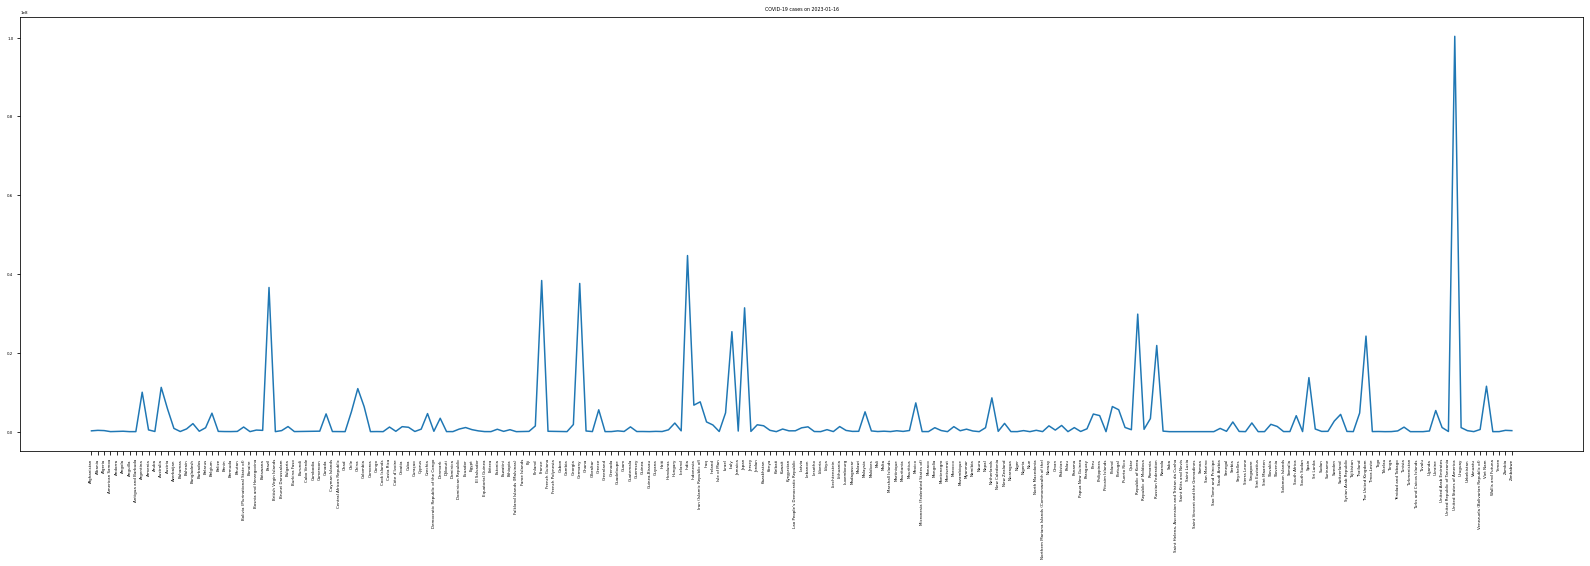

In [ ]:
plt.figure(figsize=(28,8))
plt.plot(combined_dataset['Country'],combined_dataset['Cumulative_cases'])
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 4})
plt.title('COVID-19 cases on 2023-01-16')

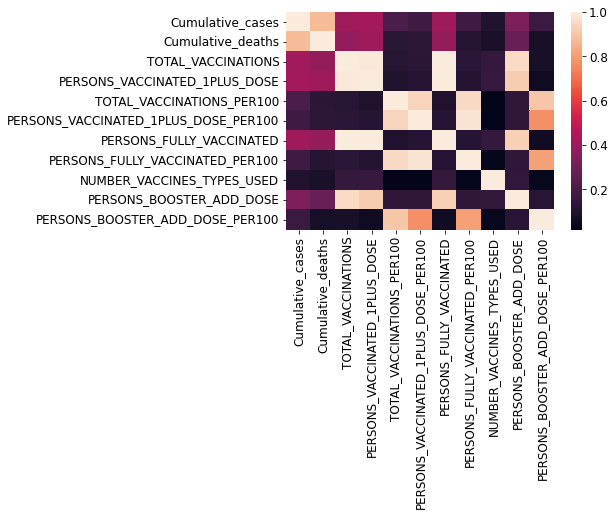

In [ ]:
plt.rcParams.update({'font.size': 12})
sns.heatmap(combined_dataset.corr())

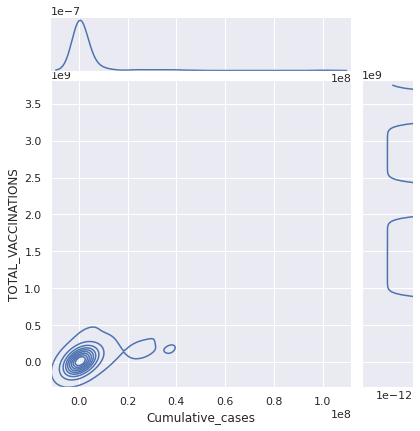

In [ ]:
sns.set(rc={'figure.figsize':(12,12)})
sns.jointplot(data=combined_dataset,x='Cumulative_cases',y='TOTAL_VACCINATIONS',kind='kde')

<Figure size 1440x1080 with 0 Axes>

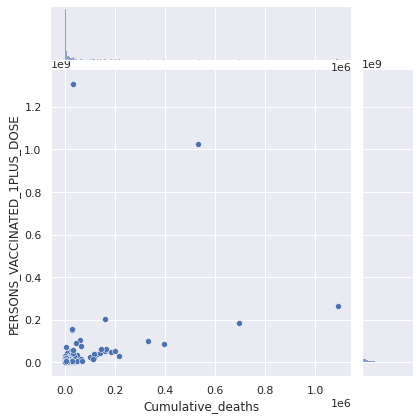

In [ ]:
plt.figure(figsize=(20,15))
sns.jointplot(data=combined_dataset,y='PERSONS_VACCINATED_1PLUS_DOSE',x='Cumulative_deaths',kind='scatter')

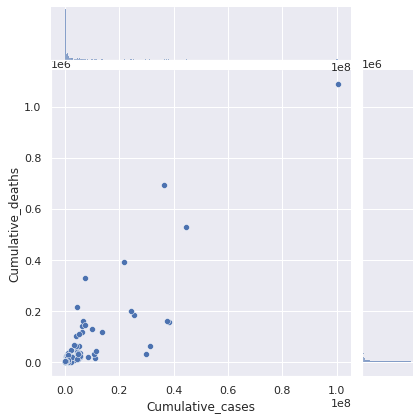

In [ ]:
sns.jointplot(data=combined_dataset,x='Cumulative_cases',y='Cumulative_deaths')

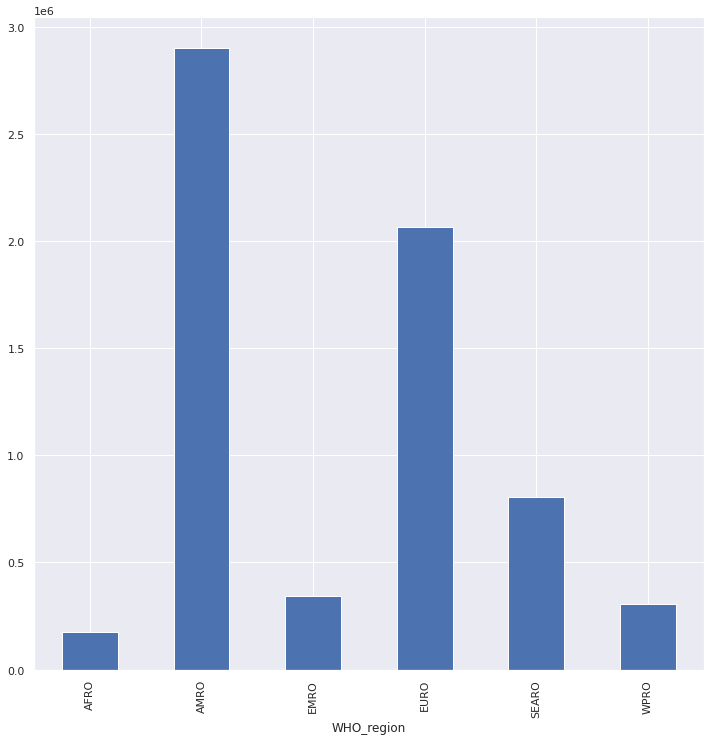

In [ ]:
combined_dataset.groupby('WHO_region').sum()['Cumulative_deaths'].plot(kind='bar')

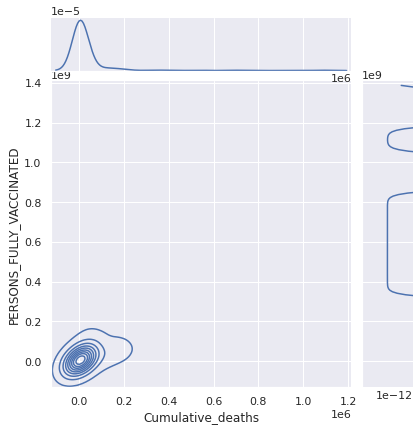

In [ ]:
sns.jointplot(data=combined_dataset,x='Cumulative_deaths',y='PERSONS_FULLY_VACCINATED',kind='kde')

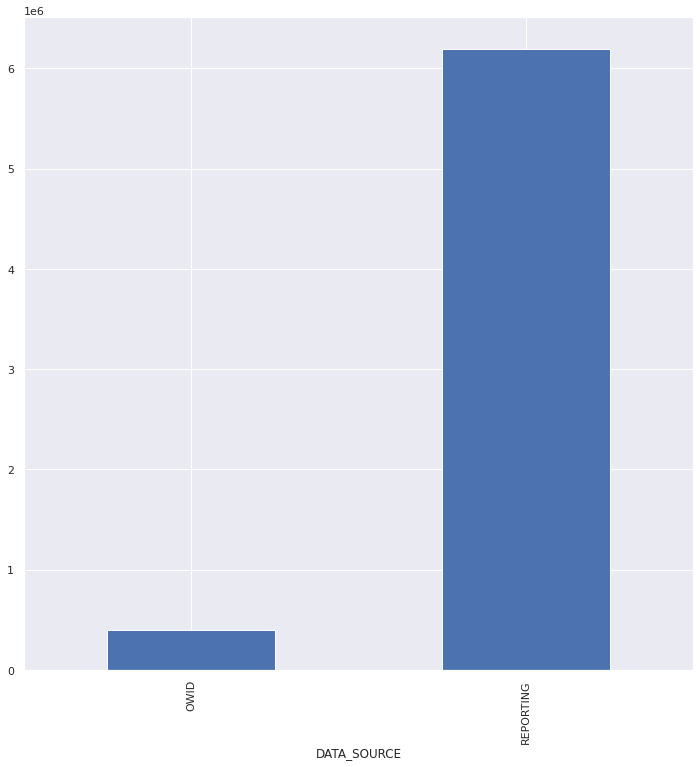

In [ ]:
combined_dataset.groupby('DATA_SOURCE').sum()['Cumulative_deaths'].plot(kind='bar')

In [ ]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 224
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country_code                          225 non-null    object 
 1   Country                               225 non-null    object 
 2   WHO_region                            225 non-null    object 
 3   Cumulative_cases                      225 non-null    int64  
 4   Cumulative_deaths                     225 non-null    int64  
 5   DATA_SOURCE                           225 non-null    object 
 6   TOTAL_VACCINATIONS                    225 non-null    float64
 7   PERSONS_VACCINATED_1PLUS_DOSE         225 non-null    int64  
 8   TOTAL_VACCINATIONS_PER100             225 non-null    float64
 9   PERSONS_VACCINATED_1PLUS_DOSE_PER100  225 non-null    float64
 10  PERSONS_FULLY_VACCINATED              225 non-null    int64  
 11  PERSONS_FULLY_VACCI

In [ ]:
final_dataset = pd.concat([combined_dataset,(pd.get_dummies(combined_dataset['WHO_region'],drop_first=True))],axis=1).drop('WHO_region',axis=1)

In [ ]:
final_dataset = pd.concat([final_dataset,(pd.get_dummies(combined_dataset['DATA_SOURCE'],drop_first=True))],axis=1).drop('DATA_SOURCE',axis=1)

In [ ]:
final_dataset = pd.concat([final_dataset,(pd.get_dummies(combined_dataset['FIRST_VACCINE_YEAR'],drop_first=True))],axis=1).drop('FIRST_VACCINE_YEAR',axis=1)

In [ ]:
final_dataset = pd.concat([final_dataset,(pd.get_dummies(combined_dataset['FIRST_VACCINE_MONTH'],drop_first=True))],axis=1).drop('FIRST_VACCINE_MONTH',axis=1)

In [ ]:
final_dataset

,Country_code,Country,Cumulative_cases,Cumulative_deaths,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,...,2999,02,03,04,05,06,07,10,11,12
0,AF,Afghanistan,207969,7855,12526397.0,11533150,32.178,29.627,10825004,27.808,...,0,1,0,0,0,0,0,0,0,0
1,AL,Albania,333072,3596,3025728.0,1342243,105.100,47.163,1270016,44.625,...,0,0,0,0,0,0,0,0,0,0
2,DZ,Algeria,271255,6881,15267442.0,7840131,34.817,17.879,6481186,14.780,...,0,0,0,0,0,0,0,0,0,0
3,AS,American Samoa,8309,34,111316.0,44885,201.670,81.318,41423,75.046,...,0,0,0,0,0,0,0,0,0,1
4,AD,Andorra,47781,159,154367.0,57901,199.800,76.009,53485,70.211,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,VN,Viet Nam,11526140,43186,265336568.0,90427458,272.591,92.900,85705657,88.049,...,0,0,1,0,0,0,0,0,0,0
221,WF,Wallis and Futuna,3427,7,16782.0,6592,149.226,58.616,6989,62.147,...,0,0,1,0,0,0,0,0,0,0
222,YE,Yemen,11945,2159,1242982.0,1006274,4.167,3.374,761003,2.551,...,0,0,0,1,0,0,0,0,0,0
223,ZM,Zambia,335641,4028,13581376.0,10937674,73.876,59.496,8530651,46.403,...,0,0,0,1,0,0,0,0,0,0


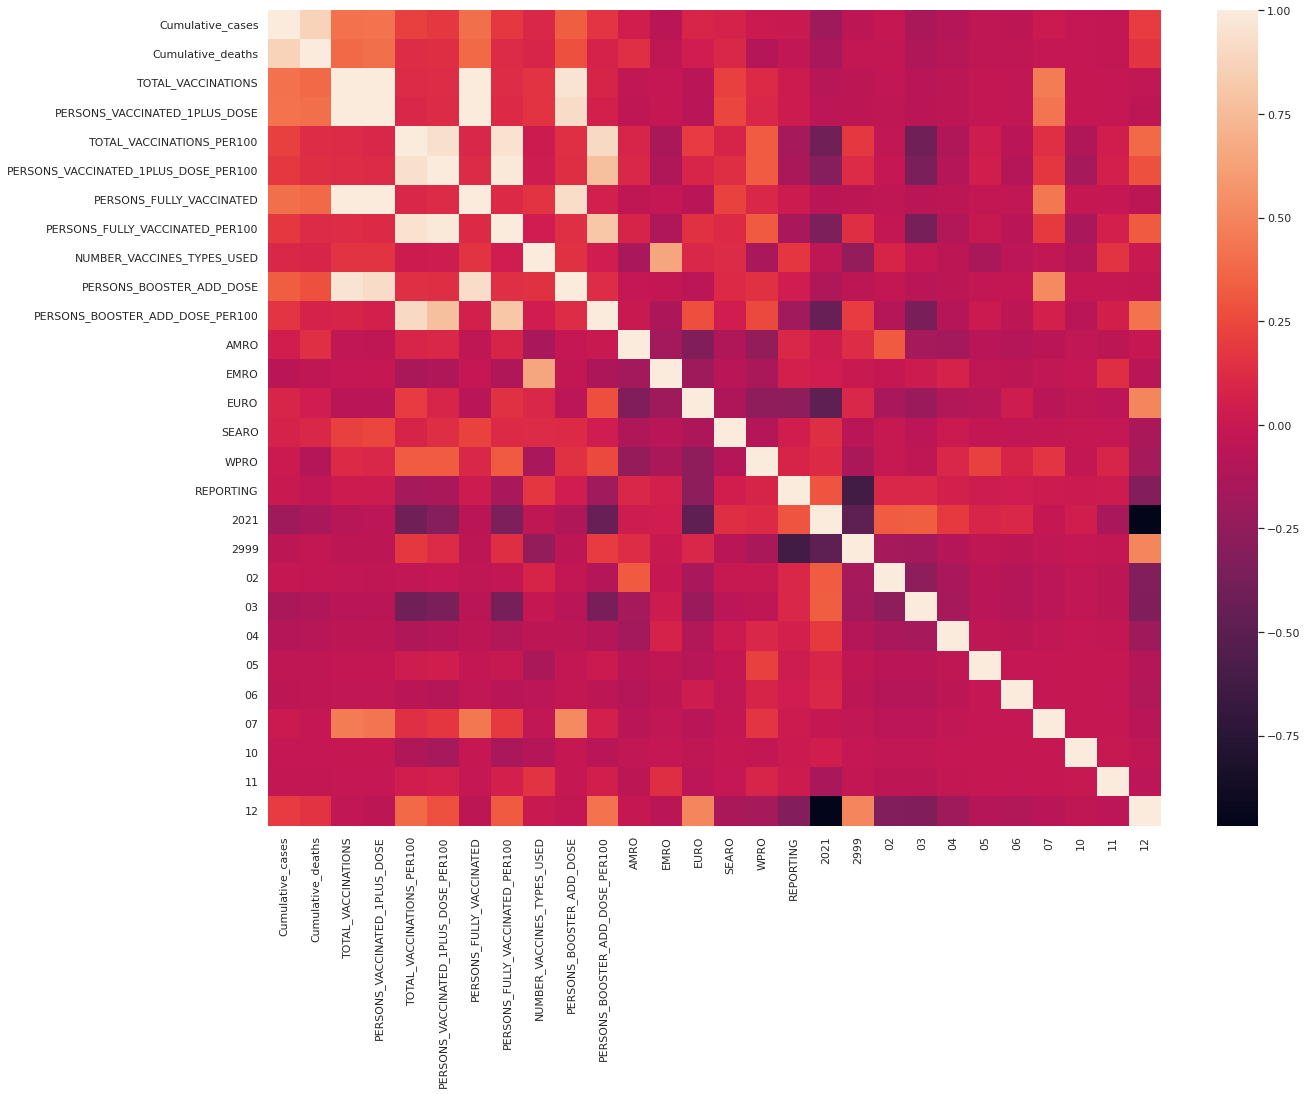

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(final_dataset.corr())

In [ ]:
final_dataset[final_dataset['Country']=='India']

,Country_code,Country,Cumulative_cases,Cumulative_deaths,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,...,2999,02,03,04,05,06,07,10,11,12
94,IN,India,44681154,530726,2.201172e+09,1025624155,159.505,74.32,951375772,68.94,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def code_vaccine(x):
  string = ''.join(list(map(str,x)))
  return int(string,2)

In [ ]:
code_vaccine(final_dataset['VACCINES_USED'][0])

25812593152

In [ ]:
final_dataset['VACCINES_USED']=final_dataset['VACCINES_USED'].apply(code_vaccine)

In [ ]:
indias_data = final_dataset[final_dataset['Country']=='India']
final_dataset.drop(index=94,inplace=True)

In [ ]:
X = final_dataset.drop('Cumulative_deaths',axis=1)
y = final_dataset['Cumulative_deaths']

In [ ]:
# Preparing the Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.3,random_state=101)

In [ ]:
model = RandomForestRegressor()

In [ ]:
RandomForestRegressor(n_estimators= 150,criterion='mae',)

RandomForestRegressor(criterion='mae', n_estimators=150)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 51 to 96
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country_code                          156 non-null    object 
 1   Country                               156 non-null    object 
 2   Cumulative_cases                      156 non-null    int64  
 3   TOTAL_VACCINATIONS                    156 non-null    float64
 4   PERSONS_VACCINATED_1PLUS_DOSE         156 non-null    int64  
 5   TOTAL_VACCINATIONS_PER100             156 non-null    float64
 6   PERSONS_VACCINATED_1PLUS_DOSE_PER100  156 non-null    float64
 7   PERSONS_FULLY_VACCINATED              156 non-null    int64  
 8   PERSONS_FULLY_VACCINATED_PER100       156 non-null    float64
 9   VACCINES_USED                         156 non-null    int64  
 10  NUMBER_VACCINES_TYPES_USED            156 non-null    float64
 11  PERSONS_BOOSTER_ADD

In [ ]:
model.fit(X_train.drop(['Country','Country_code'],axis=1),Y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test.drop(['Country','Country_code'],axis=1))

In [ ]:
W

NameError: ignored

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,y_pred)

17565.31264705883

In [ ]:
indias_predicted_death_toll = model.predict(indias_data.drop(['Country','Country_code','Cumulative_deaths'],axis=1))

In [ ]:
indias_data['Cumulative_deaths']

94    530726
Name: Cumulative_deaths, dtype: int64

In [ ]:
indias_predicted_death_toll

array([763445.57])

In [ ]:
# difference of cases
indias_predicted_death_toll - indias_data['Cumulative_deaths']

94    232719.57
Name: Cumulative_deaths, dtype: float64

In [ ]:
percentage = (indias_predicted_death_toll - indias_data['Cumulative_deaths'])/indias_data['Cumulative_deaths']

In [ ]:
percentage*100

94    43.849288
Name: Cumulative_deaths, dtype: float64

In [ ]:
final_model = RandomForestRegressor(n_estimators= 150,criterion='mae',)
final_model.fit(X.drop(['Country','Country_code'],axis=1),y)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mae', n_estimators=150)

In [ ]:
a = final_model.predict(indias_data.drop(['Country','Country_code','Cumulative_deaths'],axis=1))

,Country_code,Country,Cumulative_cases,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,...,2999,02,03,04,05,06,07,10,11,12


In [ ]:
np.abs(indias_data['Cumulative_deaths'] - a)/indias_data['Cumulative_deaths']

94    0.08261
Name: Cumulative_deaths, dtype: float64